## Detailed Article Explaination

The detailed code explanation for this article is available at the following link:

https://www.daniweb.com/programming/computer-science/tutorials/542589/image-analysis-using-llama-3-2-vision-instruct-model

For my other articles for Daniweb.com, please see this link:

https://www.daniweb.com/members/1235222/usmanmalik57



## Importing Required Libraries

In [1]:
!pip install huggingface_hub==0.24.7

In [67]:
import os
import base64
from IPython.display import display, HTML
from IPython.display import Image
from huggingface_hub import InferenceClient
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

## A Basic Image Analysis Example with Llama 3.2 Vision Instruct Model

In [55]:
image_url = r"https://healthier.stanfordchildrens.org/wp-content/uploads/2021/04/Child-climbing-window-scaled.jpg"
Image(url=image_url, width=600, height=600)

In [56]:
hf_token = os.environ.get('HF_TOKEN')
llama3_2_model_client = InferenceClient(token=hf_token)

model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"
query = "Describe the image please in one line please!"

response =  llama3_2_model_client.chat_completion(
    model=model_id,
    temperature = 0,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "image_url", "image_url": {"url": image_url}},
                {"type": "text", "text": query},
                ],
        }
    ],
    max_tokens=1024,
)
print(response.choices[0].message.content)

A young child with blonde hair and blue striped pajamas is climbing on a wicker chair in front of a window.


In [57]:
def analyze_image(query, image_url):
    
    
    response =  llama3_2_model_client.chat_completion(
        model=model_id,
        temperature = 0,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "image_url", "image_url": {"url": image_url}},
                    {"type": "text", "text": query},
                    ],
            }
        ],
        max_tokens=1024,
    )
    return response.choices[0].message.content


query = "You are a baby sitter. Do you see any dangerous sitation in the image? If yes, how to prevent it?"
image_url = r"https://healthier.stanfordchildrens.org/wp-content/uploads/2021/04/Child-climbing-window-scaled.jpg"

response = analyze_image(query, image_url)
print(response)


The image depicts a child sitting on the back of a wicker chair, which is a common scenario in many households. However, it's essential to note that this behavior can be hazardous, especially if the child is not properly supervised.

To prevent potential accidents, it's crucial to ensure the child's safety by:

1. **Supervision**: Always keep an eye on the child when they are near windows or other areas where they could potentially fall.
2. **Window Safety**: Install window guards or stops to prevent the window from opening more than a few inches, reducing the risk of the child falling out.
3. **Furniture Stability**: Ensure that the wicker chair is securely anchored to the floor to prevent it from tipping over if the child climbs on it.
4. **Education**: Teach children about the importance of staying away from windows and not climbing on furniture without adult supervision.
5. **Safe Environment**: Create a safe environment by removing any hazardous objects or materials that could cau

## Graph Analysis

In [58]:
image_url = r"https://globaleurope.eu/wp-content/uploads/sites/24/2023/12/Folie2.jpg"
Image(url=image_url, width=600, height=600)

In [60]:
query =  "You are a an expert graph and visualization expert. Can you summarize the graph?"
response = analyze_image(query, image_url)
print(response)


**Summary of the Graph: General Government Gross Debt in Euro Area in 2023, percent of GDP**

The graph presents a comprehensive overview of the general government gross debt in the Euro area as a percentage of GDP for 2023. The data is sourced from the International Monetary Fund's World Economic Outlook Database, October 2023.

**Key Observations:**

*   **Highest Debt Levels:** Greece and Italy have the highest debt levels, exceeding 160% of their GDP.
*   **Lowest Debt Levels:** Estonia has the lowest debt level, below 20% of its GDP.
*   **Median Debt Level:** The median debt level across all countries is approximately 60% of GDP.
*   **Trend:** There is a general trend of decreasing debt levels as you move from left to right on the graph, indicating that countries with higher debt levels tend to have lower GDPs.

**Insights:**

*   **Debt Burden:** The graph highlights the significant debt burden faced by some Euro area countries, with Greece and Italy being the most affected.
* 

In [61]:
query =  "You are a an expert graph and visualization expert. Can you convert the graph to table such as Country -> Debt?"
response = analyze_image(query, image_url)
print(response)

Sure, here is the data in a table format:

| Country          | Debt |
| :--------------- | :--- |
| Greece           | 180  |
| Italy            | 140  |
| France           | 120  |
| Spain            | 110  |
| Portugal         | 100  |
| Belgium          | 90   |
| Cyprus           | 80   |
| Austria          | 70   |
| Germany          | 60   |
| Finland          | 60   |
| Slovenia         | 50   |
| Malta            | 50   |
| Slovak Republic  | 50   |
| Netherlands      | 40   |
| Latvia           | 40   |
| Ireland          | 30   |
| Lithuania        | 30   |
| Luxembourg       | 30   |
| Estonia          | 20   |

Note: The data is presented in a simple table format, with each row representing a country and the corresponding debt percentage. The table is sorted in descending order by debt percentage.


## Image Sentiment Prediction

In [64]:
image_url = r"https://www.allprodad.com/wp-content/uploads/2021/03/05-12-21-happy-people.jpg"
Image(url=image_url, width=600, height=600)

In [65]:
query =  "You are helpful psychologist. Can you predict facial sentiment from the input image"
response = analyze_image(query, image_url)
print(response)

Based on the image, the individual appears to be smiling, which is a common indicator of happiness or positive sentiment. The person's facial expression suggests that they are feeling content or joyful.


## Analyzing Multiple Images

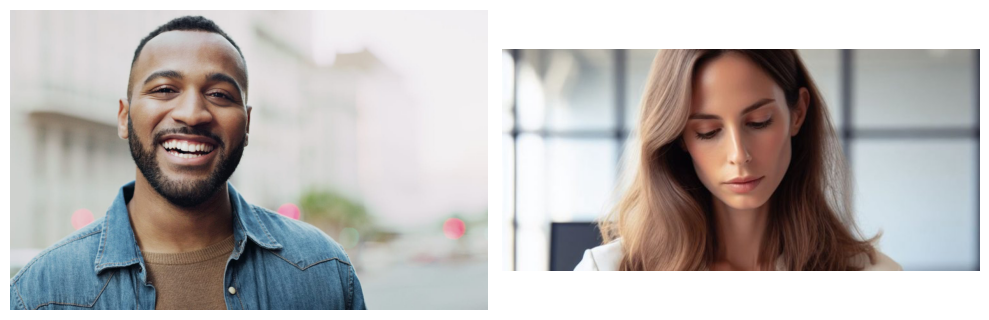

In [69]:
# URLs of the images
image_url1 = r"https://www.allprodad.com/wp-content/uploads/2021/03/05-12-21-happy-people.jpg"
image_url2 = r"https://www.shortform.com/blog/wp-content/uploads/2023/12/sad-woman-looking-down-eyes-slightly-closed-750x350.jpg"

# Fetch the images from the URLs
response1 = requests.get(image_url1)
response2 = requests.get(image_url2)

# Open the images using Pillow
img1 = Image.open(BytesIO(response1.content))
img2 = Image.open(BytesIO(response2.content))

# Create a figure to display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(img1)
axes[0].axis('off')  # Hide axes

# Display the second image
axes[1].imshow(img2)
axes[1].axis('off')  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()

In [70]:
def analyze_multiple_images(query, image1_url, image2_url):
    
    
    response =  llama3_2_model_client.chat_completion(
        model=model_id,
        temperature = 0,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "image_url", "image_url": {"url": image1_url}},
                    {"type": "image_url", "image_url": {"url": image2_url}},
                    {"type": "text", "text": query},
                    ],
            }
        ],
        max_tokens=1024,
    )
    return response.choices[0].message.content


In [72]:
query =  "You are helpful psychologist. Can you explain all the differences in the two images?"
response = analyze_multiple_images(query, image_url1, image_url2)
print(response)

The two images you provided are of women, but they have distinct facial expressions and features. Here are some differences I've observed:

1.  **Facial Expression:** The first image appears to be a neutral or slightly smiling face, while the second image has a more serious or concerned expression.
2.  **Eye Contact:** In the first image, the eyes seem to be looking directly at the camera, while in the second image, the eyes are cast downward, giving a sense of introspection or sadness.
3.  **Mouth Shape:** The first image has a slightly curved mouth, indicating a hint of a smile, whereas the second image has a more straight or downturned mouth, suggesting a more serious or unhappy mood.
4.  **Skin Tone:** The skin tone in both images appears to be similar, but the lighting in the second image might be slightly different, making the skin appear slightly paler.
5.  **Hair Style:** The hair style in both images is different. The first image has a more casual, relaxed hairstyle, while the